**Исследование объявлений о продаже квартир**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Оглавление

1. [(Шаг 1) Просмотр данных](#start)
2. [(Шаг 2) Предобработка данных](#preprocessing)
      * [Обработка пропущенных значений](#null)    
      * [Замена типа данных](#replace)
      * [Проверка дубликатов](#dublicates)
3. [(Шаг 3) Добавление данных в таблицу](#add)   
3. [(Шаг 4) Исследовательский анализ данных](#analysis)
      * [Просмотр основных параметров](#main)
      * [Время продажи квартир](#time)
      * [Фильтрация данных для анализа](#filter)
      * [Анализ факторов, влияющих на стоимость квартир](#implement)
      * [Анализ квартир в Санкт-Петербурге](#peter)
4. [(Шаг 5) Общий вывод по проекту](#inference)


## Шаг 1. Просмотр данных  <a id="start" ></a>

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', 100)
try:  # local import
    data = pd.read_csv('/Users/iyaneklyudova/Downloads/real_estate_data.csv', sep = '\t')
    
except:  # from Praktikum server
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Кол-во записей в колонках не одинаковое. Значит есть пропуски данных. Очень мало данных в колонках **is_apartment, parks_nearest, ponds_nearest**. Но эти колонки для анализа не понадобятся. Однако, в колонках, нужных для анализа, так же есть пропуски. Это **ceiling_height, living_area, kitchen_area, locality_name, cityCenters_nearest, days_exposition, floors_total**.
Формат даты не удобен для анализа. В некоторых колонках формат дробных чисел. Это также не удобно для анализа

### Вывод

Необходима предварительная обработка данных до анализа.

## Шаг 2. Предобработка данных  <a id="preprocessing"></a>

### Обработка пропущенных значений  <a id="null" ></a>

In [2]:
nan_number = data.isna().sum()
print(nan_number)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В каких то колонках очень много пропусков, в каких то совсем мало. Посмотрим детально каждый столбец.
Но, помимо пропусков, нужно еще проверить данные на достоверность.


**Количество комнат**

In [3]:
data['studio'].mean()

0.006287185113295919

In [4]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


Есть строки, у которых кол-во комнат равно 0. Эти нули могли появится у квартир-студий и квартир со свободной планировкой. Люди могут неправильно интерпретировать эти понятия и считать что комнат нет вообще. Но если есть 4 стены, то как минимум есть 1 комната на всё помещение. Заменим 0 на 1 в таких квартирах и посмотрим сколько строк c 0 останется после этого.

In [5]:
data.loc[(data['rooms'] == 0)&(data['studio'] == True),'rooms'] = 1
data.loc[(data['rooms'] == 0)&(data['open_plan'] == True),'rooms'] = 1
print(data['rooms'].value_counts())

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64


0 комнат больше нет. Значит это была неправильная интерпретация понятий, а не ошибка выгрузки.
Но в списке так же есть квартиры с очень большим кол-вом комнат. Больше 6 комнат это нетепично даже для частных домов. Посмотрим их кол-во.

In [6]:
data['rooms'][data['rooms']>6].count()

90

In [7]:
print(90/23699)

0.00379762859192371


Всего 90 шт. Это 0.3% от общего числа. Такие данные могли появится в результате опечатки. Но их мало и в дальнейшем анализе можно будет исключить такие строки

**Высота потолка**

In [8]:
ceiling_mean = data['ceiling_height'].mean()
print(ceiling_mean)

2.7714988968559835


Среднее по всей колонке 2.7м.
Но проверим какие значения есть в этой колонке.

In [9]:
print(data['ceiling_height'].min(), data['ceiling_height'].max())

1.0 100.0


Минимальная высота 1 метр, что неправдоподобно. Средний рост человека 160-170 см. Люди бы не смогли там жить. Максимальная высота 100 метров, что тоже нерельно. 100 м это уже высота потолков очень больших храмов. Вряд ли кто то продает Казанский собор.

Согласно строительным нормам минимальная высота потолка должна быть 2,5 метра. Максимальная не регламентируется. Предположим что квартира двухуровневая, тогда высота не превысит 6 метров (по 3 метра на каждый уровень).
Проверим какая средняя высота будет в квартирах с высотой в диапазоне 2,5 - 6 метров.

In [10]:
data.query('ceiling_height >= 2.5 and ceiling_height <= 6').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14402.000000,1.440200e+04,14402.000000,14402.000000,14402.000000,14393.000000,13611.000000,14402.000000,13475.000000,7194.000000,11479.000000,11499.000000,11500.000000,5259.000000,11500.000000,5701.000000,11965.000000
mean,10.334190,6.855515e+06,61.978812,2.144147,2.728619,10.187244,35.716011,5.631301,10.584258,1.356686,28827.653367,14059.626141,0.637913,476.673132,0.775130,518.713208,190.693606
std,5.627357,1.021337e+07,37.079847,1.092130,0.277920,6.200291,22.906159,4.623212,6.064397,1.066713,12622.500118,8755.561421,0.820760,320.684874,0.951401,280.195940,229.125026
min,0.000000,1.219000e+04,12.000000,1.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,3.000000,0.000000,16.000000,1.000000
25%,6.000000,3.590000e+06,41.000000,1.000000,2.520000,5.000000,19.200000,2.000000,7.000000,1.000000,18557.000000,9025.000000,0.000000,284.500000,0.000000,287.000000,45.000000
50%,10.000000,4.880000e+06,53.485000,2.000000,2.650000,9.000000,30.900000,4.000000,9.000000,1.000000,26755.000000,12949.000000,0.000000,448.000000,0.000000,504.000000,103.000000
75%,15.000000,7.090000e+06,71.500000,3.000000,2.800000,14.000000,43.300000,7.000000,12.000000,2.000000,37091.000000,16032.000000,1.000000,602.000000,1.000000,733.000000,248.000000
max,50.000000,4.200000e+08,900.000000,16.000000,6.000000,60.000000,409.700000,30.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Средняя  все равно пролучилась 2.7м. Заменим пропуски на это значение. Все что ниже 2,5 и выше 6 метров скорее всего ошибка ввода или опечатка -лишний ноль в конце или единица в начале. Но их мало и на среднее значение они не влияют. Оставим как есть, а при анализе исключим из выборки.

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.7)
data['ceiling_height'].isna().sum()

0

Пропуски по высоте зполнены.

**Общее количество этажей в доме**.

In [12]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Нулей нет. Максимальная цифра этажа 60. Самое высокое здание в Санкт-Петербурге имеет 88 этажей, значит 60 этажей вполне могут существовать. Но есть пропуски. Их немного, но нужно заполнить, тк данные понадобятся для определения типа этажа квартиры. Пропуски могли появится при заполнении данных продавцом, который посчитал что это несущественные детали

Стандартное отклонение 6,5. Это много, значит данные сильно не однородны и среднее в 9 этажей не подходит. Может получится, что поставим 9 этаж как последний в доме, а квартира при этом будет на 16 этаже.

Сначала посмотрим все данные на гистограмме.

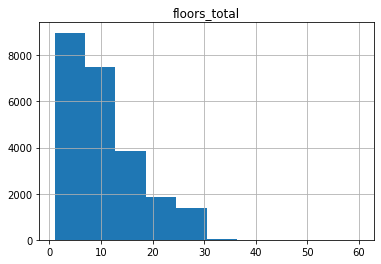

In [13]:
data.hist('floors_total',bins=10, range=(1, 60))
plt.show()

После 30 этажей кол-во разко снижается. Проверим по гистограмме размаха.

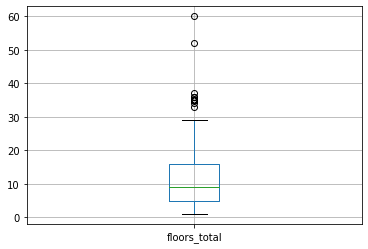

In [14]:
data.boxplot('floors_total')
plt.show()

Граница квартального размаха находится ок 30, все что за ней будем считать выбросом

Проверим какое кол-во этажей в доме встречается чаще всего. 

In [15]:
data['floors_total'].value_counts(ascending = False)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Чаще всего встречаются 5 , 9, 12, 16 и 25 этажей. Заполним пропуски исходя из указанного этажа кватиры, чтобы не поставить этаж ниже, и посмотрим не остались ли после этого пропуски

In [16]:
data.loc[(data['floors_total'].isna()) & (data['floor'] <=5), 'floors_total'] = 5
data.loc[(data['floors_total'].isna()) & (data['floor'] > 5)&(data['floor'] <=9), 'floors_total'] = 9
data.loc[(data['floors_total'].isna()) & (data['floor'] > 9)&(data['floor'] <=12),'floors_total'] = 12
data.loc[(data['floors_total'].isna()) & (data['floor'] > 12)&(data['floor'] <=16),'floors_total'] = 16
data.loc[(data['floors_total'].isna()) & (data['floor'] > 16)&(data['floor'] <=25),'floors_total'] = 25

data['floors_total'].isna().sum()

0

Пропусков больше нет. Значит пропуски этажей были только в кварирах ниже 25 этажа.

**Жилая площадь и площадь кухни**

Заполним пропуски в данных по жилой площади и площади кухни. Пропуски могли появится при заполнении данных продавцом, который посчитал что для продажи достаточно указать общую площадь квартиры. 

В данных, где нет пропусков, посчитаем долю жилой площади и площади кухни от общей площади. И затем заполним пропуски медианой, но в зависимости от кол-ва комнат. Как правило, чем больше кол-во комнат , тем больше становится доля жилая площадь и меньше доля кухни.

In [17]:
data['living_area_part'] = data['living_area']/data['total_area']
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area_part'].transform('median'))
data['living_area'].isna().sum()

0

По такому же принципу заполним данные по площади кухни. 

In [18]:
data['kitchen_area_part'] = data['kitchen_area']/data['total_area']
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area_part'].transform('median'))
data['kitchen_area'].isna().sum()

0

Пропуски по площадям заполнены

**Населенный пункт**

In [19]:
data['locality_name'].isna().sum()

49

In [20]:
print(data['locality_name'].isna().sum()/len(data))

0.002067597788936242


Пропусков по местоположению совсем мало. Никакой привязки к имеющимся данным в таблице нет. Расстояние до аэропорта не поможет, тк это расстояние может считаться на 360 градуов вокруг аэропорта. Поэтому оставим пропуски как есть.

**Расстояние до центра**

In [21]:
print(data['cityCenters_nearest'].isna().sum()/len(data))

0.23287902443141062


Пропусков по расстоянию до центра довольно много, но заполнить нечем. В таблице нет ни адреса ни координатов gps.
Эти данные рассчитывались системой. Если адрес был написан с опечаткой, то система могла не распознать его и расстояние не посчиталось. Оставим как есть

**Продолжительность объявления**

In [22]:
print(data['days_exposition'].isna().sum()/len(data))

0.13422507278788134


В данных о снятии объявления много пропусков, но заполнить так же нечем. Скорость продажи квартиры зависит сразу от нескольких факторов: цена, местоположение, число комнат, этаж и пр. Рассчитывать среднее или медиану только по одному признаку было бы неправильно. Оставим пропуски как есть. 

### Замена типа данных  <a id="replace"></a>

Переведем формат даты в читаемый вид и приведем колонки с ценой, этажами и продолжительностью объявления к целому типу. 

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data[['last_price', 'floors_total']]= data[['last_price', 'floors_total']].astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

Большая часть пропусков заполнена. Остались столбцы **is_apartment, balcony, airports_nearest,parks_around3000, ponds_around3000,parks_nearest, parks_nearest**. Но они для анализа не понадобятся.

### Проверка дубликатов  <a id="replace"></a>

In [25]:
print(data.duplicated().sum())

0


Дубликатов нет

## (Шаг 3) Добавление данных в таблицу <a id="add"></a>

Добавим в таблицу день недели, месяц и год публикации объявления

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,1,6,2018


Дни недели в виде чисел 0, 1, 2, 3 выглядят не очень понятно. Добавим названия.

In [27]:
data.loc[(data['weekday'] == 0),'weekday'] = '1_понедельник'
data.loc[(data['weekday'] == 1),'weekday'] = '2_вторник'
data.loc[(data['weekday'] == 2),'weekday'] = '3_среда'
data.loc[(data['weekday'] == 3),'weekday'] = '4_четверг'
data.loc[(data['weekday'] == 4),'weekday'] = '5_пятница'
data.loc[(data['weekday'] == 5),'weekday'] = '6_суббота'
data.loc[(data['weekday'] == 6),'weekday'] = '7_воскресенье'
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,4_четверг,3,2019
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,2_вторник,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,4_четверг,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,5_пятница,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,2_вторник,6,2018


Посчитаем стоимость квадратного метра.

In [28]:
data['price_per_m2'] = data['last_price']/ data['total_area']
data['price_per_m2']  = data['price_per_m2'].astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year,price_per_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,4_четверг,3,2019,120370
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,2_вторник,12,2018,82920
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,4_четверг,8,2015,92785
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,5_пятница,7,2015,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,2_вторник,6,2018,100000


Добавим колонку, определяющую вид этажа: первый, последний и другое. 

In [29]:
data['floor_type'] = data['floor']
data.loc[((data['floor_type'] < data['floors_total'])&(data['floor_type'] != 1)),'floor_type'] = 'другое'
data.loc[(data['floor_type'] == 1),'floor_type'] = 'первый'
data.loc[(data['floor_type'] == data['floors_total']),'floor_type'] = 'последний'
display(data.head(5))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year,price_per_m2,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,4_четверг,3,2019,120370,другое
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,2_вторник,12,2018,82920,первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,4_четверг,8,2015,92785,другое
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,5_пятница,7,2015,408176,другое
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,2_вторник,6,2018,100000,другое


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [30]:
data['living_area_part'] = data['living_area']/data['total_area']
data['kitchen_area_part'] = data['kitchen_area']/data['total_area']
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year,price_per_m2,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,4_четверг,3,2019,120370,другое
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,2_вторник,12,2018,82920,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,4_четверг,8,2015,92785,другое
3,0,64900000,159.00,2015-07-24,3,2.70,14,0.631667,9,NaN,False,False,0.128571,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.003973,0.000809,5_пятница,7,2015,408176,другое
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,2_вторник,6,2018,100000,другое
5,10,2890000,30.40,2018-09-10,1,2.70,12,14.400000,5,NaN,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.299342,1_понедельник,9,2018,95065,другое
6,6,3700000,37.30,2017-11-02,1,2.70,26,10.600000,6,NaN,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.284182,0.386059,4_четверг,11,2017,99195,другое
7,5,7915000,71.60,2019-04-18,2,2.70,24,0.585009,22,NaN,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.008171,0.263966,4_четверг,4,2019,110544,другое
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.430000,26,NaN,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.265682,3_среда,5,2018,87454,другое
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.714754,0.106557,7_воскресенье,2,2017,88524,другое


Пропуски заполнены, тип данных в необходимых колонках измнен. 

## Шаг 4. Исследовательский анализ данных <a id="#analysis"></a>

### Просмотр основных параметров  <a id="main"></a>


Построим диаграммы размаха чтобы определить выбросы

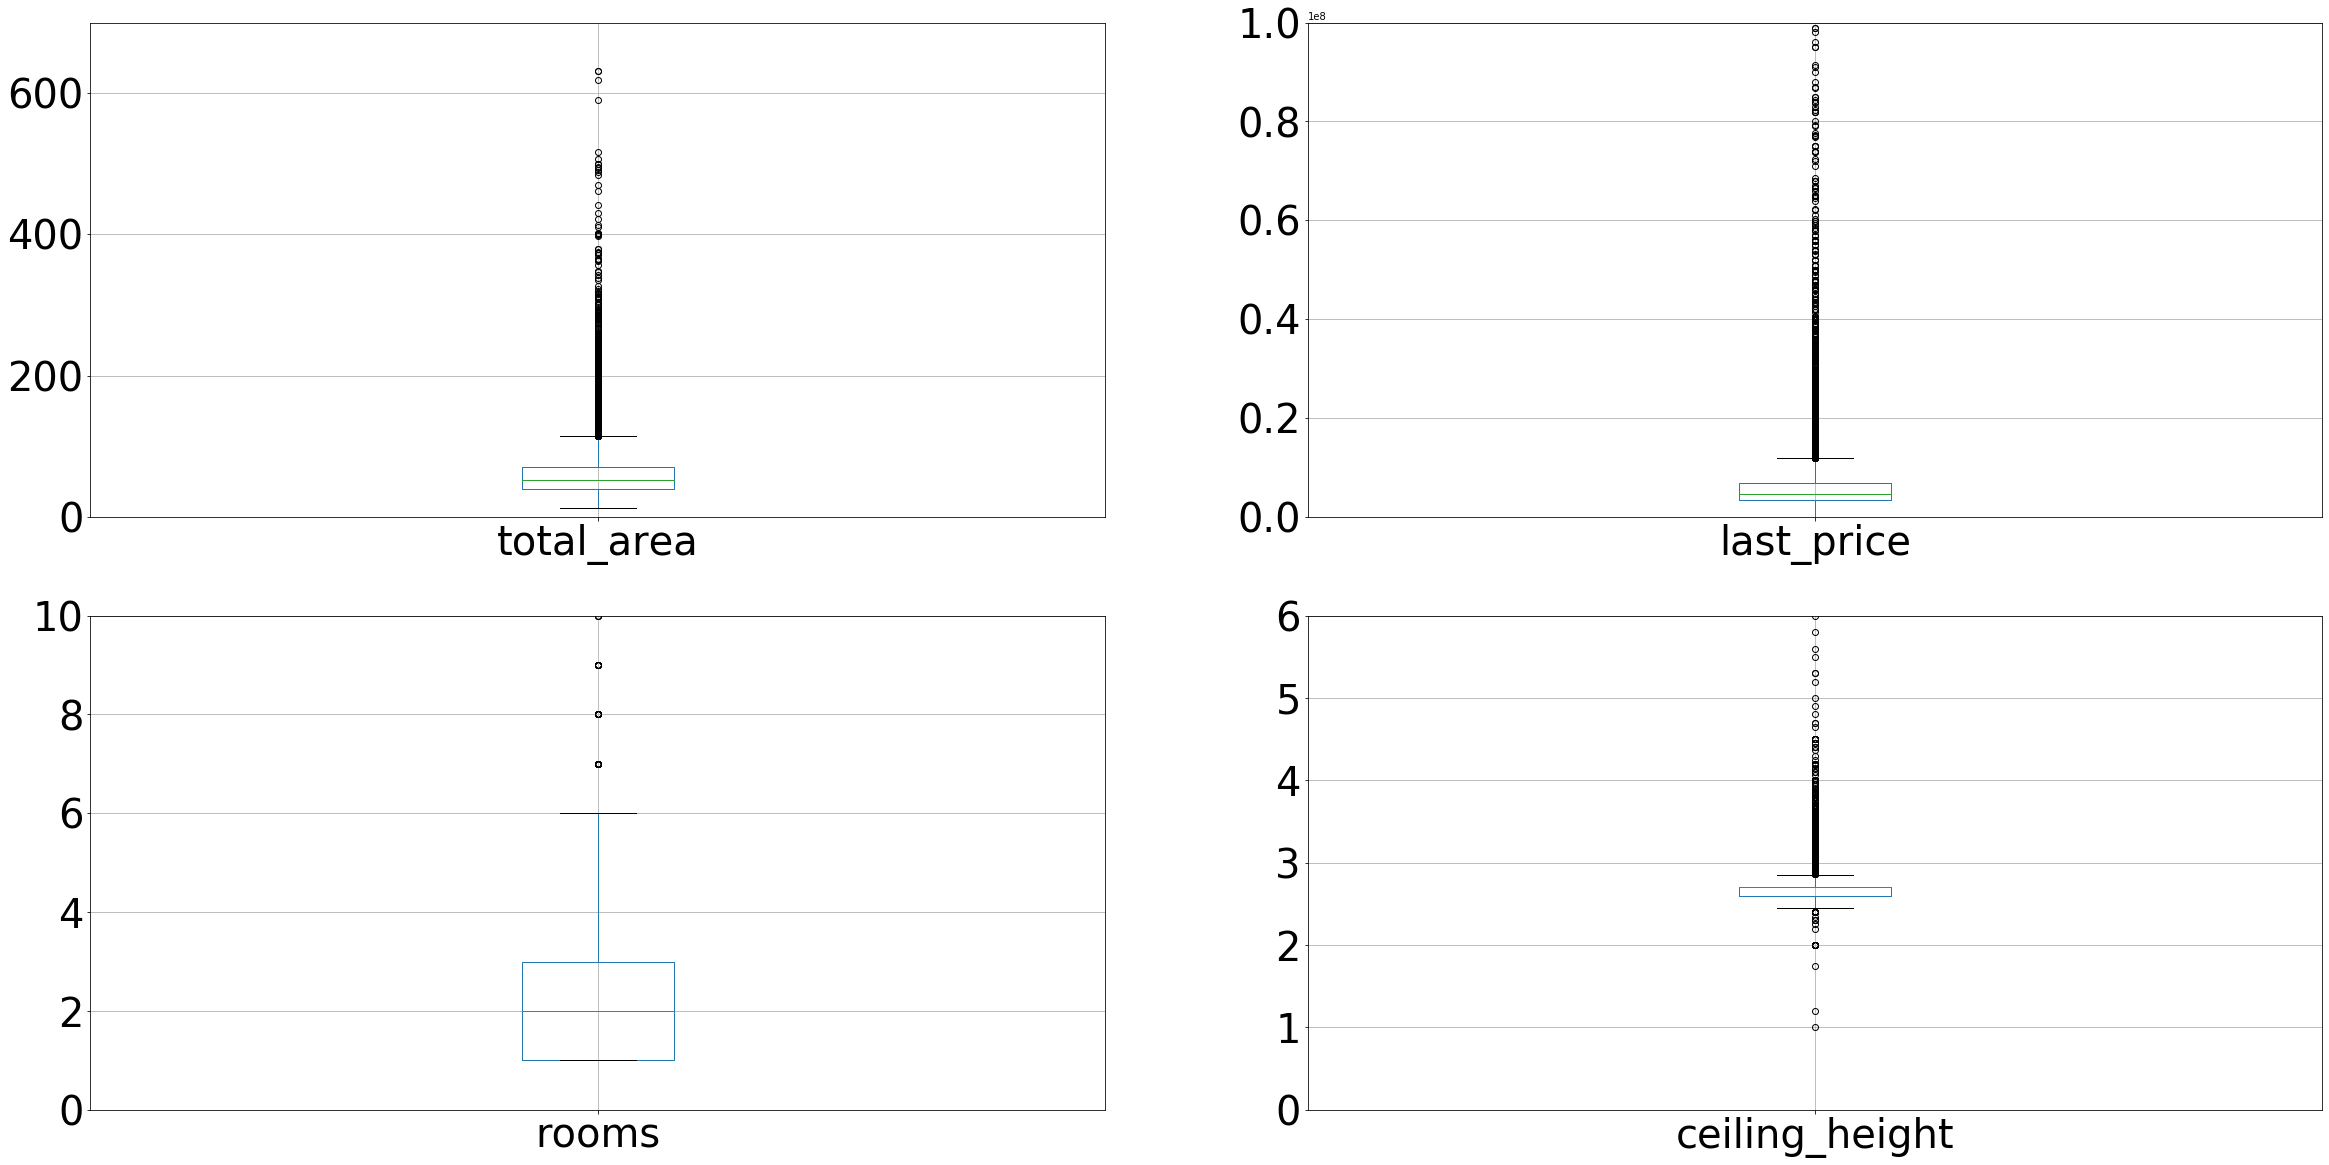

In [31]:
rows=2
cols=2
fig, axes=plt.subplots(rows, cols, figsize=(40,20))
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims=[700, 100000000, 10, 6]
count = 0
for a in range(rows):
    for b in range(cols):
        ax=data.boxplot(column = columns_list[count],ax=axes[a,b],fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count+=1
        

На диаграмме размаха **total_area** граница квартального размаха находится ок 100, все что за ней считается выбросом. Но их достаточно много. И в классе элитных квартир распространены квартиры по 100-200 м2. 

Посмотрим на нижнюю границу.

In [32]:
print(data['total_area'].min())

12.0


12 метров. Это могут быть маленькие квартиры-студии или выставляется на продажу только комната. Для дальнейшего анализа возьмем квартиры с пощадью до 200 м2

На диаграме размаха **rooms** видно, что выбросы начинатся после 6.

На диаграмме размаха **ceiling_height** выбросы начинаются около 3м. Но мы в начале, при изучении данных, выявили что максимальная вероятная высота потолков может быть 6 метров (для многоуровневых квартир), а минимальная 2,5м.

На диаграмме размаха **last_price** также трудно определить где начинаются выбросы. Где то около 10М.  
Посмотрим на минимальную и максимальную цену.

In [33]:
print(data['last_price'].min(), data['last_price'].max())

12190 763000000


Максимальная цена 763М. Учитывая, что есть объявления по продаже квартир с площадью в 100, 200 и даже 300 квадратов, такая цена может существовать. А вот мимальна цена в 12 тыс выглядит странно. Проверим что это за объявление.

In [34]:
data_small_price = data.query('last_price == "12190"')
display(data_small_price)
print(data_small_price['locality_name'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year,price_per_m2,floor_type
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.293578,0.37156,3_среда,3,2019,111,последний


8793    Санкт-Петербург
Name: locality_name, dtype: object


2х комнатная квартира в 109м2 в Санкт-Петербурге где то в центре или возле центра. Вряд ли такое возможно. Вероятно, несколько нулей пропущено. Но сколько нулей трудно сказать. Исключим из анализа в дальнейшем, тк единичный случай. 

Посмотрим какая следующая минимальная цена и где.

In [35]:
data_price_filtered = data.query('last_price > 12190 and last_price<40000000')
data_price_filtered['last_price'].min()

430000

In [36]:
display(data_price_filtered.query('last_price == "430000"'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,weekday,month,year,price_per_m2,floor_type
14911,5,430000,54.0,2018-06-26,2,2.7,3,0.585009,3,NaN,False,False,0.161075,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.010834,0.002983,2_вторник,6,2018,7962,последний
17456,7,430000,30.4,2019-04-22,1,2.7,2,16.000000,1,NaN,False,False,6.000000,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526316,0.197368,1_понедельник,4,2019,14144,первый


430тыс в маленьких неселенных пунктах. Вполне может быть.

Построим еще раз диаграмму по отфильтрованным данным

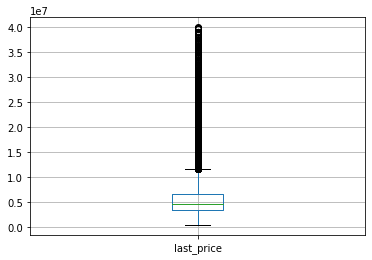

In [37]:
data_price_filtered.boxplot('last_price')
plt.show()

На диаграмме видно что выбросы начинаются от 12м, но после границы распределение довольно плотное. И так можно потерять данные по квартирам в центре города, которые стоят значительно дороже. Возьмем квартиры до 20М.

Итог по границам:
  - total_area: до 200м2
  - last_price: от 430К до 20М
  - rooms: от 1 до 6
  - ceiling_height: от 2,5м до 6м

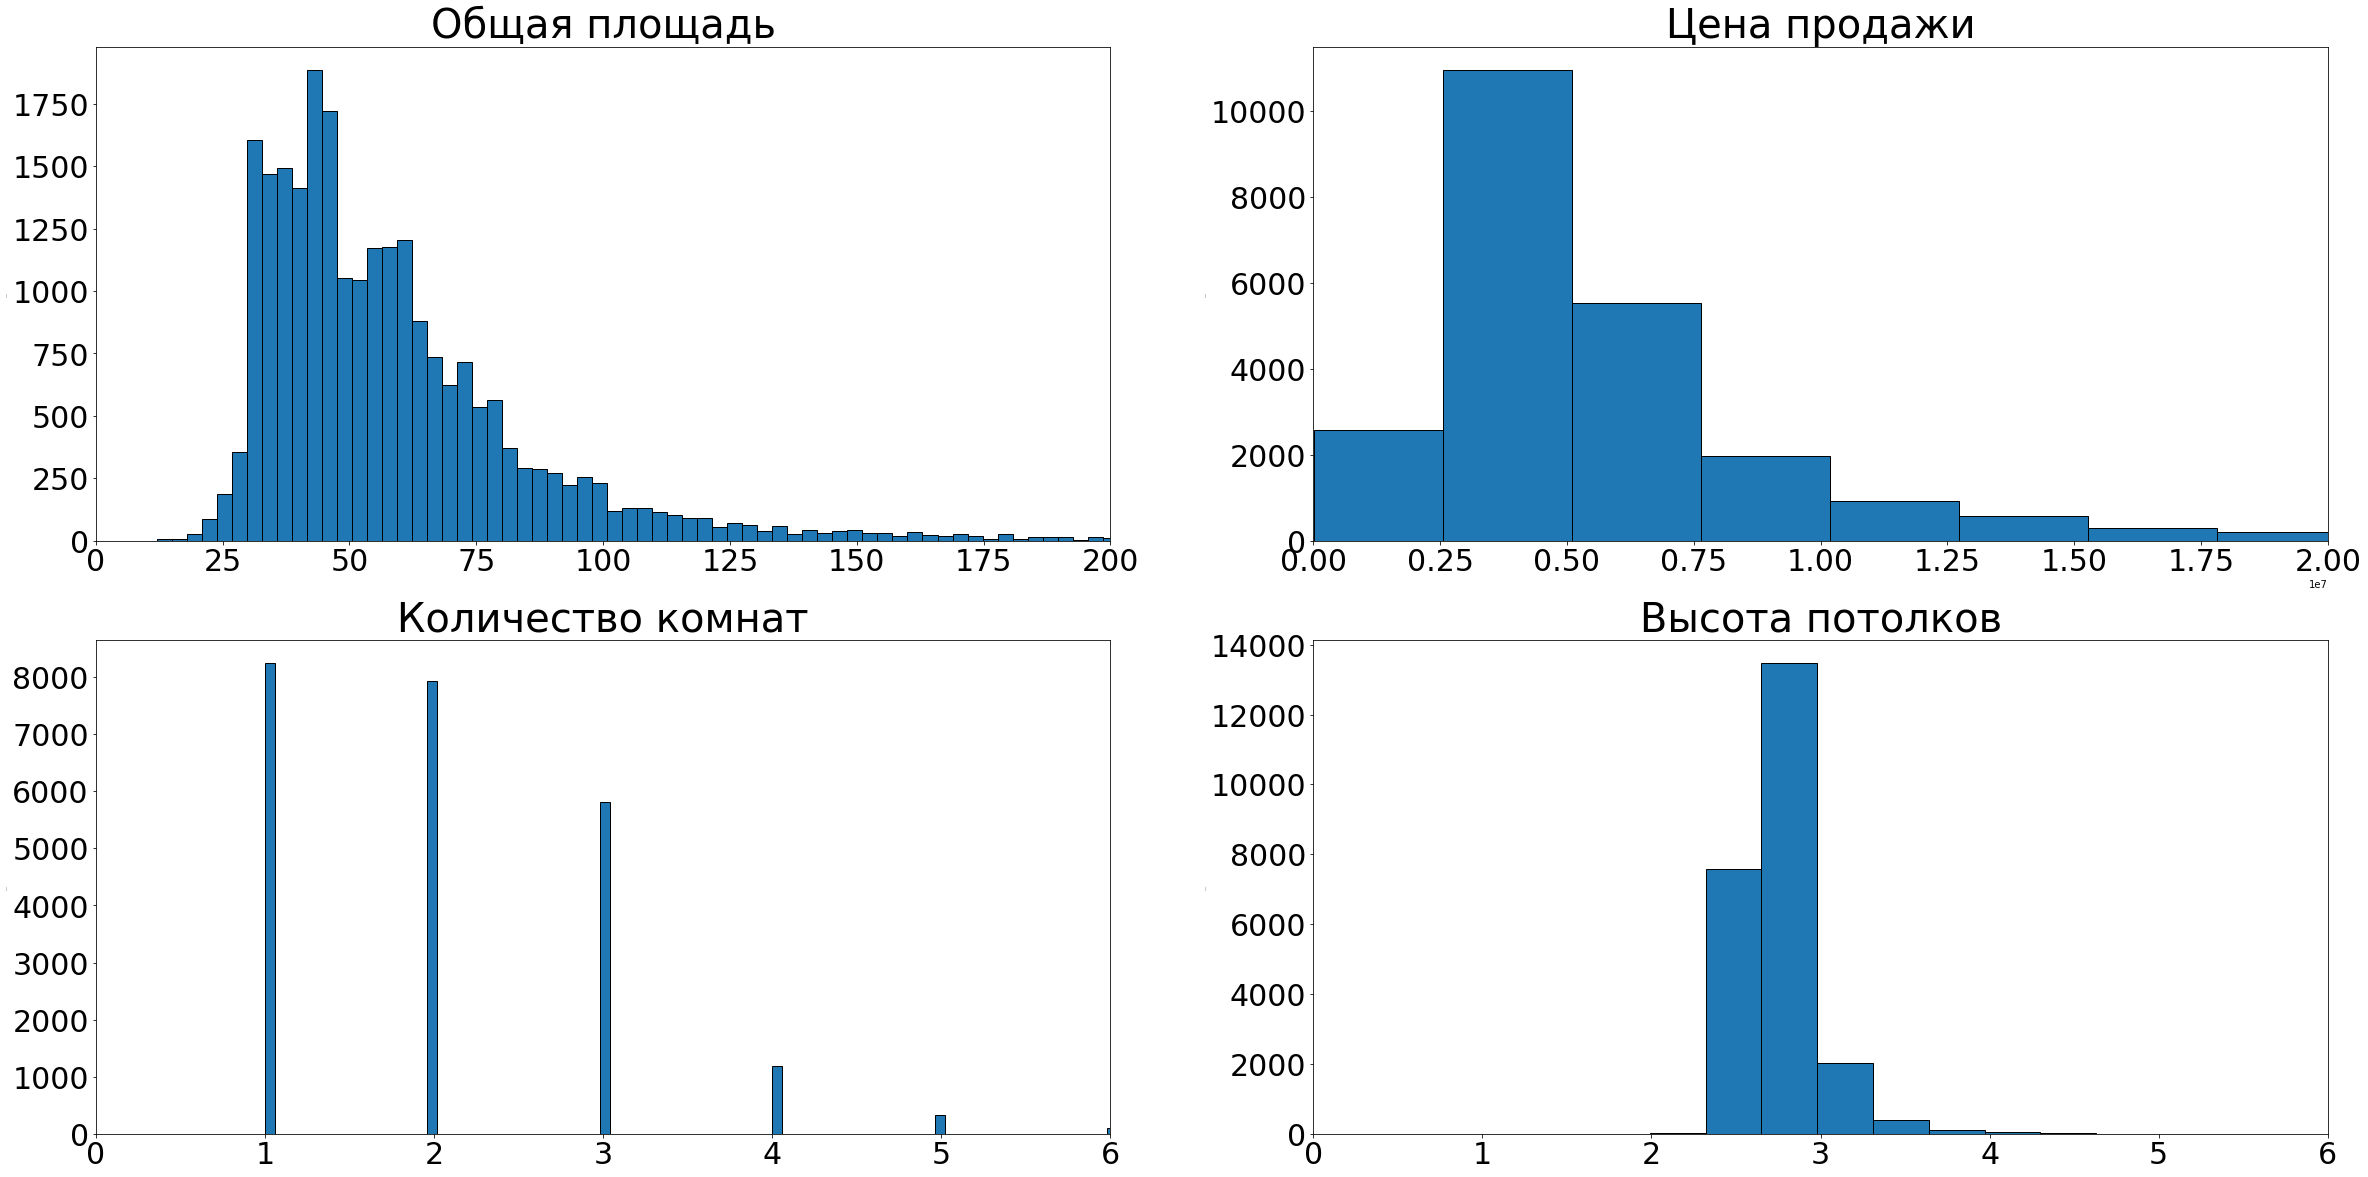

In [38]:
data_list = [data['total_area'], data['last_price'], data['rooms'], data['ceiling_height']]
data_titles_list = ['Общая площадь', 'Цена продажи', 'Количество комнат', 'Высота потолков']
xlims_list = [200, 20000000, 6, 6]
nrow = 2
ncol = 2
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(40,20))
count = 0
for a in range(nrow):
    for b in range(ncol):
        ax= data_list[count].plot(kind = 'hist', bins = 300, fontsize=30, 
                                  title= data_titles_list[count], ec= 'black', ax=axes[a,b])
        ax.set_xlim(0, xlims_list[count])
        ax.title.set_position([0.5, 1.0])    
        ax.title.set_size(40)
        ax.yaxis.label.set_size(0)
        count += 1         


Основная масса объявлений по общей площади у квартир с 30 до 125 м2. Больше всего среди них объявлений с площадью от 30 до 50 м2

Больше всего объявлений о продаже однокомнатных квартир, немного меньше двухкомнатных, на третьем месте трехкомнатные квартиры. 4, 5 и 6-х комнатных квартир в разы меньше. Количество объявлений уменьшается с увеличинем кол-ва комнат 

Подавляющее большинство объявлений с высотой потолка 2.5 - 3 м. Есть немного предложений с высотой 3-3.5 м и совсем мало с высотой больше 3.5 м и меньше 2.5 м.

Больше всего обьявлений по цене от 2,5М до 5М. Более дешевых и дорогих квартир намного меньше. Чем дороже квартира тем меньше предложений.

### Время продажи квартиры  <a id="time"></a>

Построим гистограмму и посмотрим на распределение. 

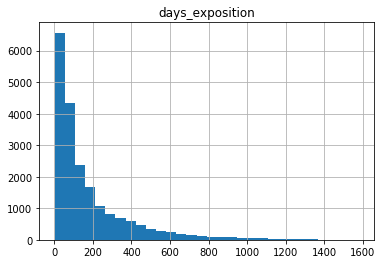

In [39]:
data_time_sell= data.query('days_exposition != 0')
data_time_sell.hist('days_exposition', bins=30)
plt.show()

Большая часть квартир продавалась в течении года. 

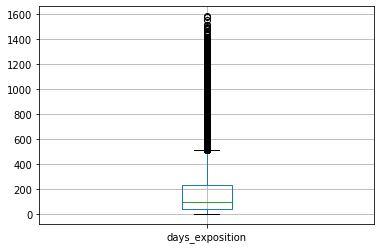

In [40]:
data_time_sell.boxplot('days_exposition')
plt.show()

На диаграмме размаха выбросы начинаются ок 500 дней. Посмотрим гистограмму по новой выборке и посчитаем среднее и медиану

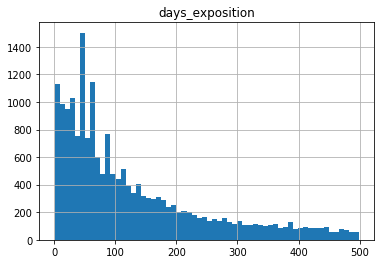

In [41]:
data_time_sell_filtered=data_time_sell.query('days_exposition!=0 and days_exposition<500')
data_time_sell_filtered.hist('days_exposition', bins=60)
plt.show()

In [42]:
print(data_time_sell_filtered['days_exposition'].mean(),data_time_sell_filtered['days_exposition'].median())

127.045725858026 84.0


Медиана 127 дней, а среднее 84 дня. Довольно большая разница и как видно из гистораммы есть отдельные всплески, которые повлияли на среднее. 
В целом можно сказать, что если квартира продавалась меньше чем за 127 дней(где то 4,5 месяца), то она продавалась достаточно быстро. 

### Фильтрация данных для анализа  <a id="filter"></a>

Сделаем фильтрацию по тем параметрам, где были выявлены выбросы: общая площадь меньше 200м2, кол-во комнат до 6 включительно, высота потолков от 2,5 до 6 м, цена продажи больше 12190  меньше 20М, время продажи до 500 дней. И будем в дальнейшем анализировать по отфильтрованным данным.  

In [43]:
data_filtered = data[(data['total_area']<200)&(data['rooms']<7)&(data['ceiling_height']>2.4)&(data['ceiling_height']<=6)&(data['last_price']<20000000)&(data['last_price']>12190)&(data['days_exposition']>0)&(data['days_exposition']<500)]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18250 entries, 1 to 23695
Data columns (total 29 columns):
total_images            18250 non-null int64
last_price              18250 non-null int64
total_area              18250 non-null float64
first_day_exposition    18250 non-null datetime64[ns]
rooms                   18250 non-null int64
ceiling_height          18250 non-null float64
floors_total            18250 non-null int64
living_area             18250 non-null float64
floor                   18250 non-null int64
is_apartment            2121 non-null object
studio                  18250 non-null bool
open_plan               18250 non-null bool
kitchen_area            18250 non-null float64
balcony                 9929 non-null float64
locality_name           18208 non-null object
airports_nearest        13977 non-null float64
cityCenters_nearest     13994 non-null float64
parks_around3000        13994 non-null float64
parks_nearest           5898 non-null float64
ponds_around

Осталось 18 тыс строк. 

### Анализ факторов, влияющих на стоимость квартиры  <a id="implement"></a>

Проверим какие факторы больше всего влияют на стоимость квартиры

**Зависимость между числом комнат и ценой**

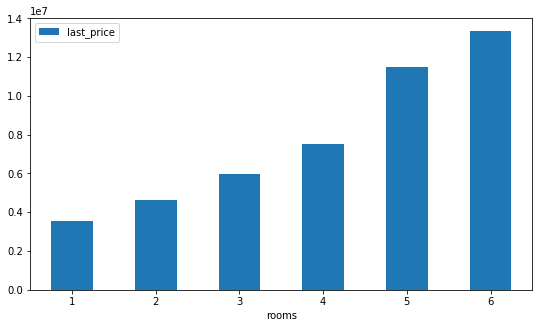

In [44]:
data_filtered.pivot_table(index ='rooms', values = 'last_price', aggfunc= 'median').plot(y = 'last_price', kind='bar', figsize=(9,5))
plt.xticks(rotation=0)
plt.show()

Прослеживается прямая зависимость. Чем больше комнат, тем выше цена.

**Зависимость между этажом и ценой**

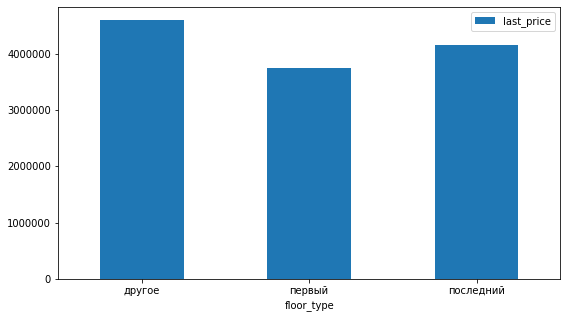

In [45]:
data_filtered.pivot_table(index ='floor_type', values = 'last_price', aggfunc= 'median').plot( y = 'last_price', kind='bar', figsize=(9,5))
plt.xticks(rotation=0)
plt.show()

Дешевле всего стоят квартиры на первом этаже. На последнем этаже квартиры тоже немного теряют в цене, по сравнению с квартирами на других этажах. То есть первый и последний этаж влияют на стоимость в сторону ее уменьшения. 

**Зависимость между днем публикации и ценой**

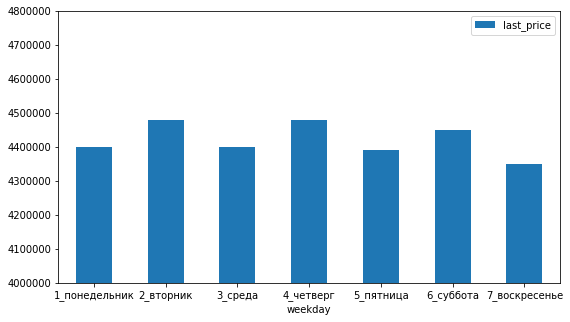

In [46]:
data_filtered.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median').plot( y = 'last_price', kind='bar', figsize=(9,5),  ylim= (4000000, 4800000))
plt.xticks(rotation=0)
plt.show()

Четкого влияния на цену день недели  не оказывает. Можно только отметить что объявления, опубликованные в воскресенье, имееют меньшую стоимость. 

**Зависимость между месяцем публикации и ценой**

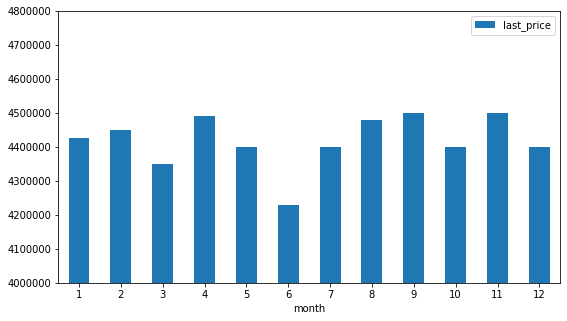

In [47]:
data_filtered.pivot_table(index ='month', values = 'last_price', aggfunc= 'median').plot(y = 'last_price', kind='bar', figsize=(9,5), ylim= (4000000, 4800000))
plt.xticks(rotation=0)
plt.show()

Дороже всего квартры продавались осенью. Дешевле всего квартиры стоили в июне, что может быть связано с началом отпускного периода, но в июле и августе цены снова повышаются. Поэтому сказать что есть какая то сильная зависмимость от месяца трудно.  

**Зависимость между годом публикации и ценой**

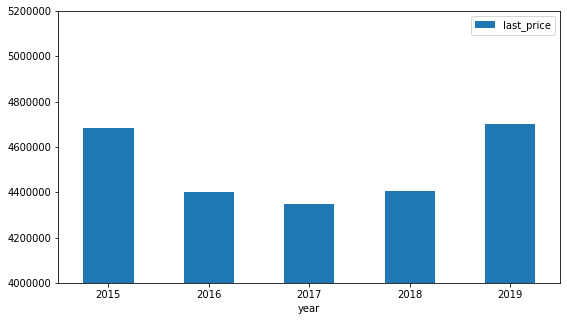

In [48]:
data_filtered.pivot_table(index ='year', values = 'last_price', aggfunc= 'median').sort_values('year').plot( y = 'last_price', kind='bar', figsize=(9,5),ylim= (4000000, 5200000))
plt.xticks(rotation=0)
plt.show()

С 2015 года по 2017 год наблюдается падение цен, а затем снова цены начали расти и в 2019 году цены были сильно выше чем в 2015. Это могло быть связно со снижением ставки по ипотеке и общей ситуацией в экономике. 
То есть цены на жилье зависят от года продажи, тк экономическая ситуация меняется от года к году

**Зависимость между площадью и ценой**

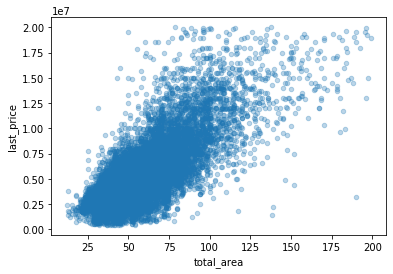

In [49]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

Данных очень много. Попробуем построить другую гистограмму.

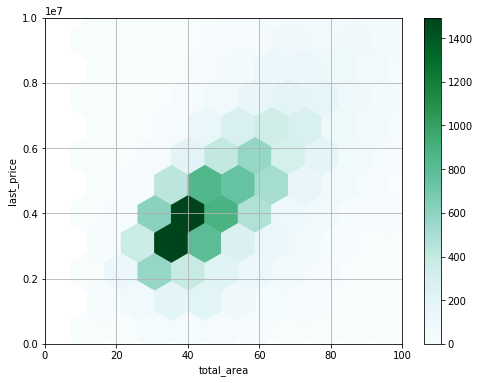

In [50]:
data_filtered.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, xlim=(0,100), ylim=(0, 10000000), figsize=(8, 6), sharex=False, grid=True)
plt.show()

В целом видно, что площадь влияет на стоимость квартиры, но все же есть разброс на графике. Посмотрим корреляцию.

In [51]:
data_filtered['total_area'].corr(data_filtered['last_price'])

0.7679990740532268

Корреляция стремится к 1, но не равно 1. То есть с увеличением площади растет цена, но вместе с тем есть и другой фактор(возможно даже несколько), оказывающий влияние на цену. 

**Зависимость между жилой площадью\площадью кухни и ценой**

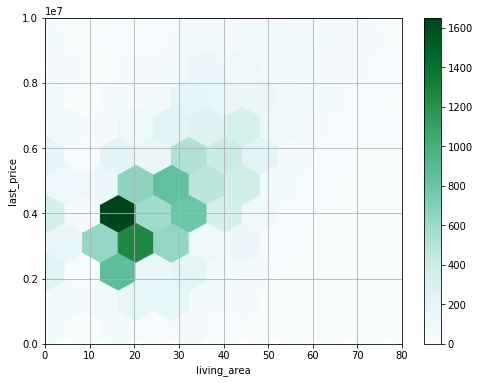

0.5413692590839331

In [52]:
data_filtered.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, xlim=(0,80), ylim=(0, 10000000), figsize=(8, 6), sharex=False, grid=True)
plt.show()
data_filtered['living_area'].corr(data_filtered['last_price'])

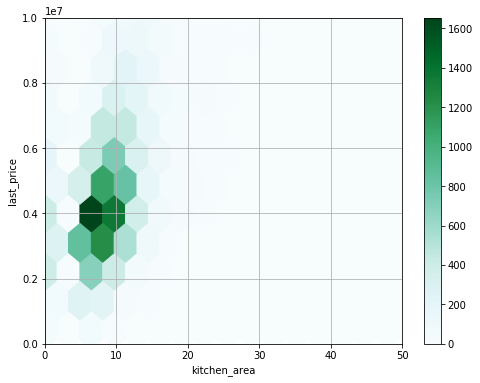

0.46289041680293064

In [53]:
data_filtered.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20, xlim=(0,50), ylim=(0, 10000000), figsize=(8, 6), sharex=False, grid=True)
plt.show()
data_filtered['kitchen_area'].corr(data_filtered['last_price'])

Жилая площадь\площадь кухни также влияют на цену, при чем жилая площадь влияет больше чем площадь кухни. Чем они больше, тем выше цена.

**Зависимость между удаленностью от центра и ценой**

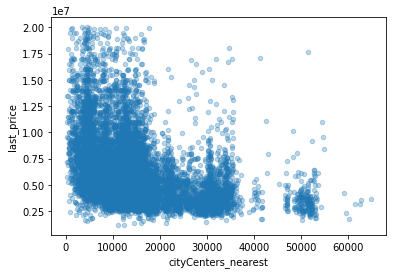

In [54]:
data_filtered.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.show()

На гистограмме видно что определенная зависимость есть, но слишом большой разброс данных. Проверим корреляцию.

In [55]:
data_filtered['cityCenters_nearest'].corr(data_filtered['last_price'])

-0.3490286753235177

Корреляция отрицательная, то есть при удалении от центра цена снижается. Однако, она все же ближе к нулю. То есть, расстояние влияет, но влияние оказывают и другие факторы.

По городу и области в целом влияние на цену оказывает площадь(общая, жилая, кухни), кол-во комнат, этаж, расстояние до центра и год публикации объявления

### Анализ квартир в Санкт-Петербурге  <a id="peter"></a>.

Сначала найдем населённые пункты с наибольшим числом объявлений и посчитаем для них среднюю цену квадратного метра.

In [56]:
price_pivot = data_filtered.pivot_table(index='locality_name', values = 'price_per_m2', aggfunc=['count','mean'])
price_pivot.columns = ['count','mean']
price_pivot['mean']= price_pivot['mean'].astype('int')
display(price_pivot.sort_values(by = 'count', ascending = False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,11954,106899
посёлок Мурино,483,86041
посёлок Шушары,385,77938
Всеволожск,307,66742
Колпино,291,74691
посёлок Парголово,286,89360
Пушкин,271,100600
деревня Кудрово,266,92656
Гатчина,243,68076


Больше всего объявлений о продаже в Санкт-Петербурге, а меньше -  в Выборге. В Санкт-Петербуге также самая высокая стомость квадратного метра. Самая маленькая стоимость квадратого метра в Выборге - почти в 2 раза меньше чем в Санкт- Петербурге. Из этих населенных пунктов Выборг дальше всех находится от Санкт-Петербуга. То есть удаленность от Санкт-Петербуга влияет на стоимость квадратного метра.

Сделаем выборку по населенному пункту Санкт-Петербург и, так как были пропуски в данных о расстоянии до центра, то поставим условие что расстояние больше нуля. Затем посчитаем стоимость жилья на километр, построим гистограмму и попробуем определить центр.

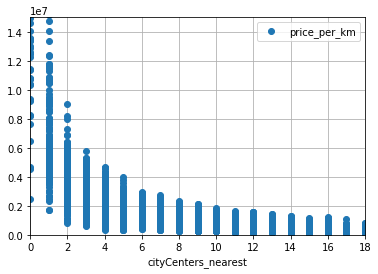

In [57]:
data_peter = data_filtered.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 0')
data_peter['cityCenters_nearest']= data_peter['cityCenters_nearest']/1000
data_peter['price_per_km'] = data_peter['last_price']/data_peter['cityCenters_nearest']
data_peter['cityCenters_nearest']=data_peter['cityCenters_nearest'].astype('int')
data_peter['price_per_km']=data_peter['price_per_km'].astype('int')

data_peter.plot(x='cityCenters_nearest', y ='price_per_km', grid=True, style ='o',xlim= (0,18), ylim=(0,15000000))
plt.show()

На гистограмме виден плавный переход цен. Попробуем построить гистограмму по неотфильтрованным данным

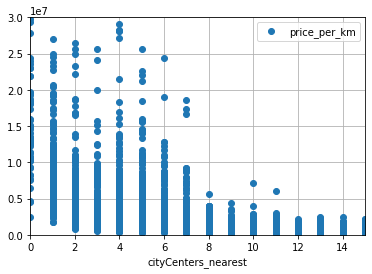

In [58]:
data_peter_raw = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 0')
data_peter_raw['cityCenters_nearest']= data_peter_raw['cityCenters_nearest']/1000
data_peter_raw['price_per_km'] = data_peter_raw['last_price']/data_peter_raw['cityCenters_nearest']
data_peter_raw['cityCenters_nearest']=data_peter_raw['cityCenters_nearest'].astype('int')
data_peter_raw['price_per_km']=data_peter_raw['price_per_km'].astype('int')
data_peter_raw.plot(x='cityCenters_nearest', y ='price_per_km', grid=True, style ='o', xlim= (0,15), ylim=(0,30000000))
plt.show()

В районе 7-8 км происходит спад цен и они становятся примерно одинаковые. Значит, территорию в радиусе 7 км будем считать центром.

Выделим сегмент квартир в центре и проанализируем.

**Общая площадь**

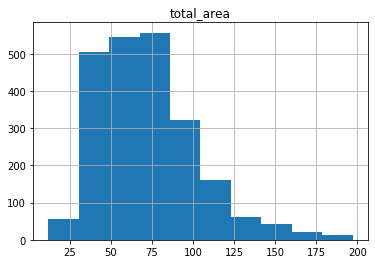

In [59]:
data_peter_center = data_peter.query('cityCenters_nearest <=7')
data_peter_center.hist('total_area', bins=10)
plt.show()

Больше всего объявлений с площадью 45 - 80 м2. По городу и области в целом были цифры 30-50 м2. То есть в центре города преобладают объявления с немного большим метражом.

**Количество комнат**

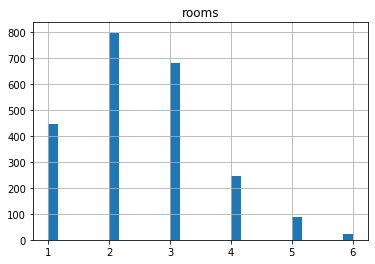

In [60]:
data_peter_center.hist('rooms', bins=30, range=(1,6))
plt.show()

В цетре преобладают предожения о продаже 2-х и 3-х комнатных квартир, тогда как по области и городу больше всего предложений 1 комнатных квартир.

**Цена продажи**

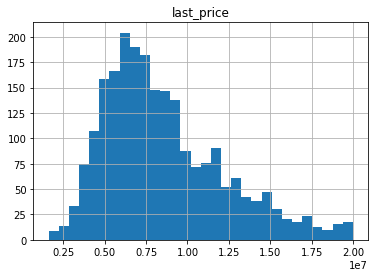

In [61]:
data_peter_center.hist('last_price', bins=30)
plt.show()

По стоимости квартир больше всего объявлений с ценой от 5 до 10М, что в 2 раза выше чем в целом по городу.


**Зависимость цены от кол-ва комнат**

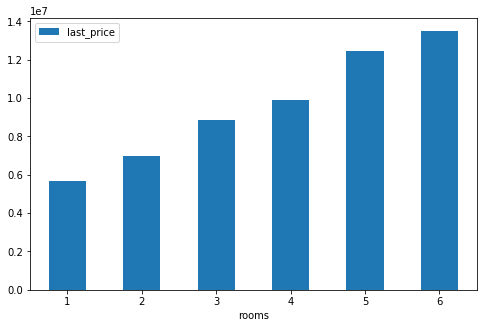

In [62]:
data_peter_center.pivot_table(index ='rooms', values = 'last_price', aggfunc= 'median').plot( y = 'last_price', kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

Гистограмма показывает прямую зависимость между ценой и кол-вом комнат. Чем больше комнат тем выше цена. Это совпадает с анализом по городу и области

**Зависимось цены от этажа**

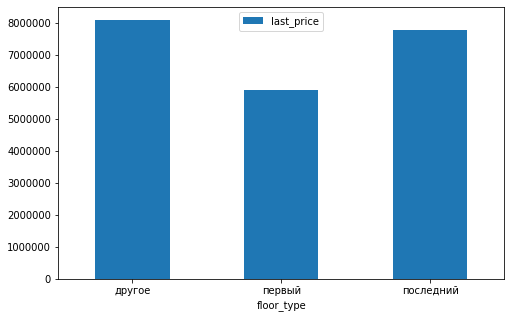

In [63]:
data_peter_center.pivot_table(index ='floor_type', values = 'last_price', aggfunc= 'median').plot( y = 'last_price', kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

Первый и последний этаж влияют на цену в сторону уменьшения, так же как и во всей области. Можно еще отметить, что в центре первый этаж сильнее влияет на цену  чем в целом по городу и области. 

**Зависимость цены от дня публикации объявления**

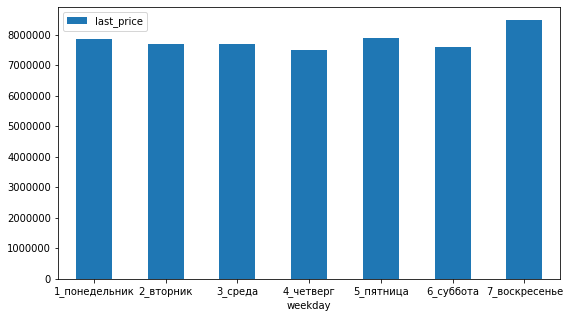

In [64]:
data_peter_center.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median').plot( y = 'last_price', kind='bar', figsize=(9,5))
plt.xticks(rotation=0)
plt.show()

На гистограмме не видно каких то всплесков цен. Только в воскресенье размещались объявления по чуть более высокой цене.

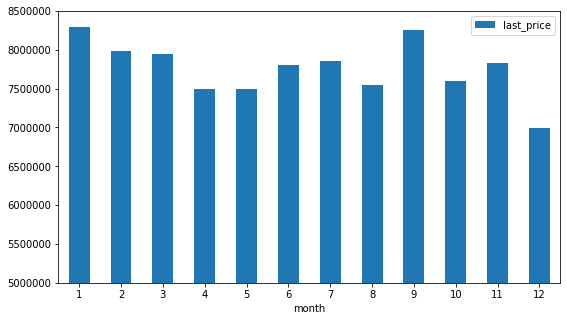

In [65]:
data_peter_center.pivot_table(index ='month', values = 'last_price', aggfunc= 'median').plot(y = 'last_price', kind='bar', figsize=(9,5), ylim= (5000000, 8500000))
plt.xticks(rotation=0)
plt.show()

С начала год наблюдалось снижение цен вплоть до марта, затем начались скачки цен. Самые низкие цены были осенью.

**Зависимость цены от месяца публикации**

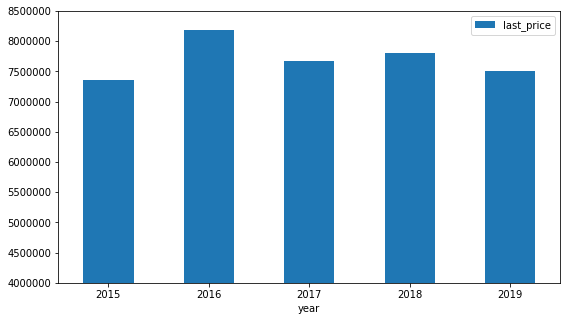

In [66]:
data_peter_center.pivot_table(index ='year', values = 'last_price', aggfunc= 'median').sort_values('year').plot( y = 'last_price', kind='bar', figsize=(9,5),ylim= (4000000, 8500000))
plt.xticks(rotation=0)
plt.show()

Самые низкие цены были в 2015 году, тогда как по городу и области в целом - в 2017 году. После 2015 года наблюдается небольшое колебание цен то вверх, то вниз. Вероятно, ставка по ипотеке и экономическая ситуация не сильно сказываются на ценах в центре города.

**Зависимость цены от площади**

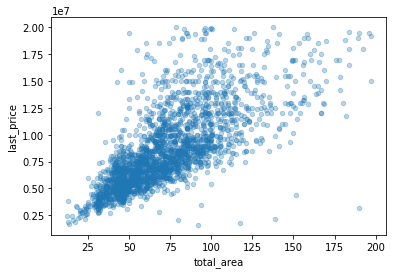

In [67]:
data_peter_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [68]:
data_peter_center['total_area'].corr(data_peter_center['last_price'])

0.7198393644872958

Суда по гистограмме и корреляции в 0,7 площадь квартиры в значительной степени влияет на цену, но не является единственным фактором. Схоже с данными по области

**Завсимость цены от расстояния до центра**

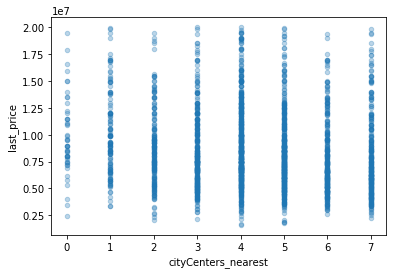

In [69]:
data_peter_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [70]:
data_peter_center['cityCenters_nearest'].corr(data_peter_center['last_price'])

-0.14495293764100312

По гистограмме и корреляции в -0.1 видно что расстояние практически никакого влияния не оказывает. Центр города - он везде центр. И в 2 км и в 5 км. Тогда как в целом по области расстояние имеет большее влияние

**Продолжительность объявлений**

In [71]:
print(data_peter_center['days_exposition'].mean(),data_peter_center['days_exposition'].median())

145.54903677758318 101.0


Медина 144 дня, а среднее 99 дней. Это выше чем по области. Квартиры в центре стоят дороже, а чем выше цена, тем дольше продается квартира. Людей, готовых платить высокую цену меньше чем тех, кто предпочитает жилье подешевле. 

Анализ объявлений в центре Санкт-Петербурга показывает, что в центре преобладают более дорогие предложения и квартиры имеют больший метраж. На цены и в центре и за его переделами влияет общая площадь, кол-во комнат и этаж. А вот год публикации и расстояния не оказывают влияние.

## Шаг 5. Общий вывод  <a id="inference"></a>

Нет какого то одного фактора, влияющего на стоимость квартиры. На стоимость влияет совокупность нескольких факторов: какие то в большей степени, какие то в меньшей. Наибольшее влияние оказывают общая площадь, кол-во комнат, размер жилой площади, площадь кухни (как видно по матрице корреляции ниже). Чем они выше/больше, тем выше цена. Также влияние оказывает удаленность от Санкт-Петербурга и удаленность от центра, кроме квартир в самом центре. Чем дальше от цетра и от самого Питера, тем цены ниже. 

Этаж влияет на стоимость только если это первый или последний. Влияет в сторону уменьшения цены и в большей степени первый этаж(особенно в центре). 

Картиры в центре Санкт-Петербурга продаются дольше, чем за его пределами, тк предложения по продаже квартир в центре по стоимости в 2 раза выше чем в остальных райнах. Также в центре преобладают предложения 2 и 3 комнатных квартир, в то время как в целом по городу и области лидируют предложения однокомнатных квартир.

Дата публикации объявления практически не оказывает влияния на цену, кроме года. На покупательную способность населения оказывает влияние ставка по ипотеке и общая экономическая ситуация, которые более заменты в разрезе года, тк не меняются каждый месяц или каждую неделю. Хотя, здесь есть исключения. Квартиры в центре Санкт-Петербурга не очень чувствительны к ставкам и изменениям в экономике. 

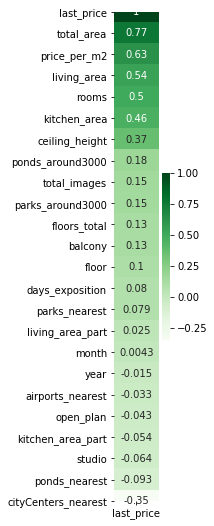

In [72]:
plt.figure(figsize=(1,9))
sns.heatmap(data_filtered.corr()[['last_price']].sort_values(by='last_price', ascending= False), cmap ="Greens", annot=True)
plt.show()